# broken_streaks

Here we characterize how stocks respond on the first good day of weather after a bad streak, and the first bad day of weather after a good streak. The results will go into our 

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
basedir = '/Users/bono/demo_projects/weather_stocks/'
# file = basedir+'data/df_clean.pkl'
file = basedir+'data/df_all.pkl'
infile = open(file,'rb')
df_all = pickle.load(infile)
infile.close()

## Remove Outliers From Stock Data

In [3]:
import sys
sys.path.append(basedir+"src") # go to parent dir
from motion_characterizer import remove_stock_outliers as rso

In [4]:
df_clean = rso(df_all,nsigma=3)

### Show the daily motion before and after outlier removal
lump the motions for all time into a histogram:

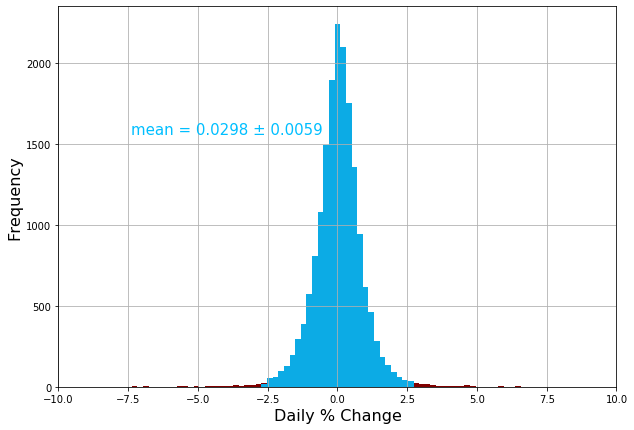

In [5]:
#setup the plot
plt.figure(figsize=(10, 7))
plt.ylabel('Frequency',fontsize=16)
plt.xlabel('Daily % Change',fontsize=16)
plt.xlim(-10,10)
plt.grid(True)

#histogram the full dataset
bins = np.linspace(-10, 10, 100)
x = df_all['PercentChange']
n, bins, patches = plt.hist(x,bins,facecolor='maroon')

#histogram the clean dataset
bins = np.linspace(-10, 10, 100)
x = df_clean['PercentChange']
n, bins, patches = plt.hist(x,bins,facecolor='deepskyblue',alpha=0.9)

#display the mean and error on mean for the clean distribution
mean = round(df_clean['PercentChange'].mean(),4)
emean = round(df_clean['PercentChange'].sem(),4)
t = plt.text(-7.4, 1560, f'mean = {mean} ± {emean}', fontsize=15, color="deepskyblue")

display the motion for each day individually:

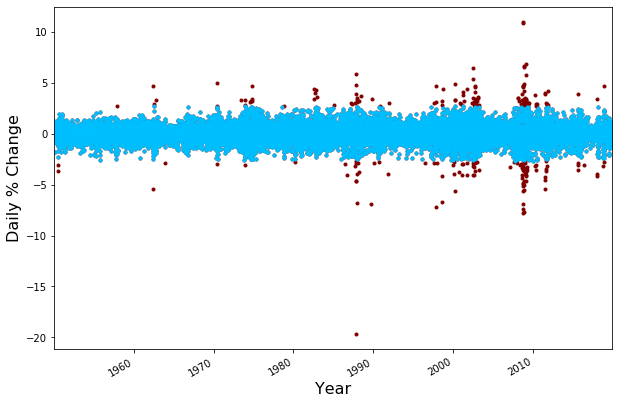

In [6]:
plt.figure(figsize=(10, 7))
plt.ylabel('Daily % Change',fontsize=16)
df_all['PercentChange'].plot(color="maroon",style='.')
df_clean['PercentChange'].plot(color="deepskyblue",style='.')
x = plt.xlabel('Year',fontsize=16)

## Look at days where good or bad weather streaks end
First seperate those days into new dataframes

In [7]:
from motion_characterizer import split_types as st
df_clean_good,df_clean_bad = st(df_clean)

histogram and characterize the stock motions for both kinds of days

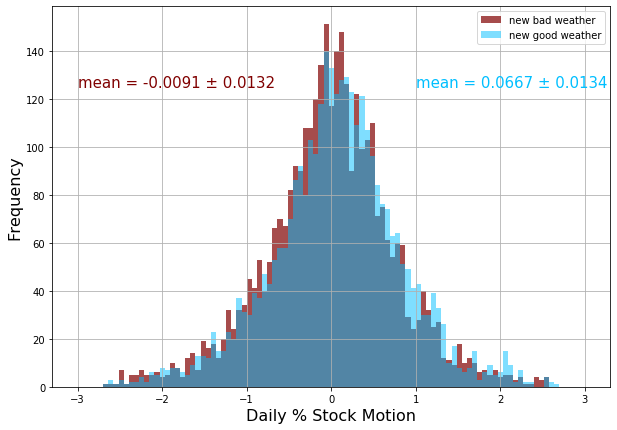

In [8]:
#clean up the notation
x_bad = df_clean_bad['PercentChange']
x_good = df_clean_good['PercentChange']
#calculate the mean and its error
mb = round(x_bad.mean(),4)
emb = round(x_bad.sem(),4)
mg = round(x_good.mean(),4)
emg = round(x_good.sem(),4)
#setup the plots
plt.figure(figsize=(10, 7))
plt.ylabel('Frequency',fontsize=16)
plt.xlabel('Daily % Stock Motion',fontsize=16)
plt.grid(True)
plt.text(-3, 125, f'mean = {mb} ± {emb}', fontsize=15, color="maroon")
plt.text(1, 125, f'mean = {mg} ± {emg}', fontsize=15, color="deepskyblue")
#produce the histogram
bins = np.linspace(-3, 3, 100)
n, bins, patches = plt.hist(x_bad,bins,facecolor='maroon',alpha=0.7,label='new bad weather')
n, bins, patches = plt.hist(x_good,bins,facecolor='deepskyblue',alpha=0.5,label='new good weather')
leg = plt.legend()

## How robust is the difference?
Test this by:
* Seeing if it persists thoughout the year (montly seperation)
* Seeing if it persists thoughout different decades

### Define a function to average over slices in various time-based arrangments of the data

In [9]:
def time_averager(df,time="month"):    
    if(time=="month"):
        group_type = df.index.month
    elif(time=="year"):
        group_type = df.index.year
    elif(time=="decade"):
        group_type = (df.index.year//10)*10     
    g = df.groupby(group_type)
    var = df['PercentChange']
    y = var.groupby(group_type).mean().values
    ey = var.groupby(group_type).sem().values
    x = np.fromiter(g.groups.keys(),dtype=float)
    return x,y,ey

### Plot the results from the time averager for the different types of days

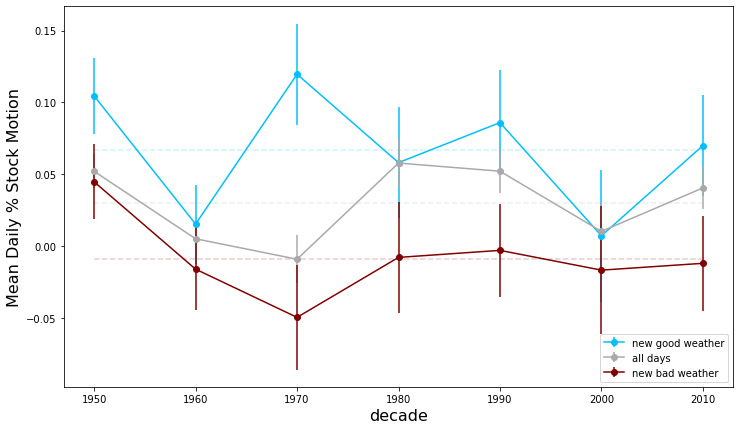

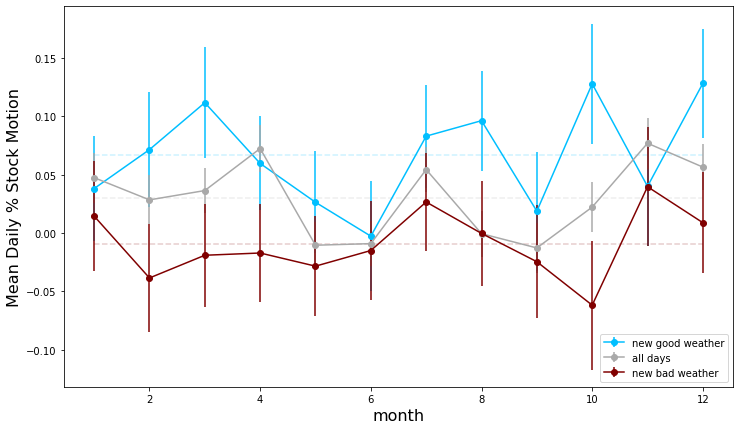

In [10]:
scales=['decade','month']
for scale in scales:
    plt.figure(figsize=(12, 7))

    plt.ylabel('Mean Daily % Stock Motion',fontsize=16)
    plt.xlabel(scale,fontsize=16)

    #good days
    x,y,ey = time_averager(df_clean_good,time=scale)
    plt.errorbar(x, y, yerr=ey, label='new good weather',c='deepskyblue',fmt='o-')
    plt.hlines(mg,x[0],x[-1], colors='deepskyblue', linestyles='--',alpha=0.2)
    
    
    #all days
    x,y,ey = time_averager(df_clean,time=scale)
    plt.errorbar(x, y, yerr=ey, label='all days',c='darkgrey',fmt='o-')
    plt.hlines(mean,x[0],x[-1], colors='darkgrey', linestyles='--',alpha=0.2)

    #bad days
    x,y,ey = time_averager(df_clean_bad,time=scale)
    plt.errorbar(x, y, yerr=ey,label='new bad weather',c='maroon',fmt='o-')
    plt.hlines(mb,x[0],x[-1], colors='maroon', linestyles='--',alpha=0.2)

    l = plt.legend(loc='lower right')